<a href="https://colab.research.google.com/github/MAzizDriss/CreditRiskAssessment/blob/main/TryingDiffrentModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
sns.set()

# Importing the data




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loans = pd.read_csv('/content/drive/MyDrive/Data/creditrisk.csv')

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32581 non-null  int64  
 1   person_age                      32581 non-null  int64  
 2   person_income                   32581 non-null  float64
 3   person_emp_length               32581 non-null  float64
 4   loan_amnt                       32581 non-null  int64  
 5   loan_int_rate                   32581 non-null  float64
 6   loan_status                     32581 non-null  int64  
 7   loan_percent_income             32581 non-null  float64
 8   cb_person_cred_hist_length      32581 non-null  int64  
 9   person_home_ownership_MORTGAGE  32581 non-null  int64  
 10  person_home_ownership_OTHER     32581 non-null  int64  
 11  person_home_ownership_OWN       32581 non-null  int64  
 12  person_home_ownership_RENT      

Now we are going to split the data into test and train data to train our models

In [ ]:
#Droping some features that we are not going to use in the model (The loan_grade will take a disscussion later)
features_to_drop = ['cb_person_cred_hist_length','cb_person_default_on_file_N','person_income','loan_amnt','loan_percent_income'
#,'loan_grade_A','loan_grade_B','loan_grade_C','loan_grade_D','loan_grade_E','loan_grade_F','loan_grade_G'
]
#Feature scaling (kinda)
loans['log_person_inc']=loans['person_income'].apply(lambda x:np.log(x)) 
loans['log_loan_amnt']=loans['loan_amnt'].apply(lambda x:np.log(x))
loans.drop(features_to_drop, axis=1, inplace=True)

In [ ]:
Target ='loan_status'
X= loans.drop(Target, axis=1)
Y=loans.loan_status

In [ ]:
X

,Unnamed: 0,person_age,person_emp_length,loan_int_rate,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,...,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,log_person_inc,log_loan_amnt
0,0,22,23.0,16.02,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,10.985293,10.463103
1,1,21,5.0,11.14,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,9.169518,6.907755
2,2,25,1.0,12.87,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,9.169518,8.612503
3,3,23,4.0,15.23,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,11.089805,10.463103
4,4,24,8.0,14.27,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,10.904119,10.463103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,1.0,13.16,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,10.878047,8.665613
32577,32577,54,4.0,7.49,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,11.695247,9.777074
32578,32578,65,3.0,10.99,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,11.238489,10.463103
32579,32579,56,5.0,11.48,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,11.918391,9.615805


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12535)

In [ ]:
print("The length of the train samples is %s"%len(X_train))
print("The length of the test samples is %s"%len(X_test))

The length of the train samples is 26064
The length of the test samples is 6517


For now I'm going to try the classifiers without the undersampling or oversamping

# Checking best classifiers for unbalanced data

## Training diffrent models

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [ ]:
#choosing best model fitting the unbalanced data -> our metric will be f1 score
model_params = {
    #'svm':{ 'model' : svm.SVC(gamma='auto',kernel='rbf',probability=True)},
    'rf': {
          'model': RandomForestClassifier(),
          },
    'lr': {
          'model': LogisticRegression(max_iter=1000),
          },
    'DT': {
          'model': DecisionTreeClassifier(), 
        },
    'XGB':{
        'model':xgb.XGBClassifier(),
      },
    'GNB':{
        'model':GaussianNB(),
     }
}

In [ ]:
from sklearn.metrics import confusion_matrix
def Cnf_mtrx(X,Y,label):
  
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  cnf_matrix =confusion_matrix(X,Y)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title(label+' Confusion matrix ', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  
  return cnf_matrix


In [ ]:
from sklearn.metrics import classification_report

def model_assess(model,X,y):
  model.fit(X,y)
  predictions=model.predict(X_test)
  cnf=Cnf_mtrx(y_test,predictions,str(model))
  cnf
  print(classification_report(y_test,predictions))
  
  

RandomForestClassifier() :
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5079
           1       0.95      0.70      0.81      1438

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.88      6517
weighted avg       0.93      0.93      0.92      6517

LogisticRegression(max_iter=1000) :
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5079
           1       0.77      0.43      0.55      1438

    accuracy                           0.85      6517
   macro avg       0.81      0.70      0.73      6517
weighted avg       0.84      0.85      0.83      6517

DecisionTreeClassifier() :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5079
           1       0.77      0.78      0.78      1438

    accuracy                           0.90      6517
   macro avg       0.86      0.86     

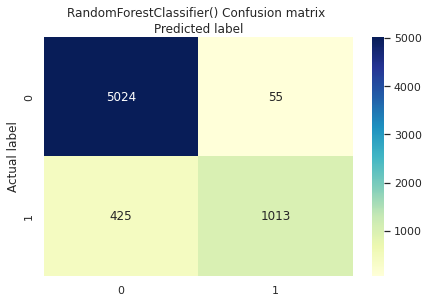

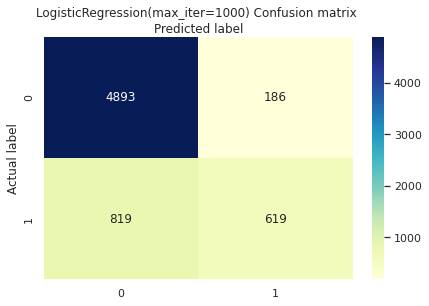

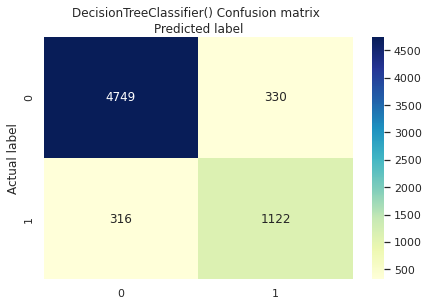

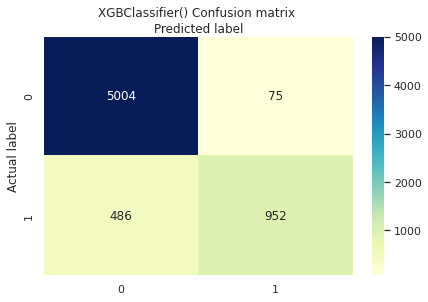

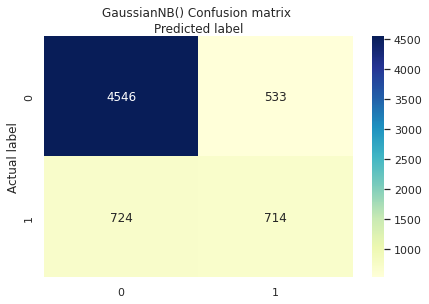

In [ ]:
from sklearn.model_selection import GridSearchCV
probas=[]
for model,md in model_params.items() :
  print(md['model'],':')
  model_assess(md['model'],X_train,y_train)
  probas.append({
      'model':model,
      'proba':md['model'].predict_proba(X_test)[:,1] #probability of the positive income is kept
  })

## Checking the ROC and AUC metrics

In [ ]:
from sklearn.metrics import auc,confusion_matrix, roc_auc_score,roc_curve,precision_recall_fscore_support

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
r_auc=roc_auc_score(y_test,r_probs)
print('random (chance) prediction : AUROC = %.3f'%r_auc)
for item in probas:
  item['auc']=roc_auc_score(y_test,item['proba'])
  print(item['model'],': AUROC = %.3f'%item['auc'])


random (chance) prediction : AUROC = 0.500
rf : AUROC = 0.936
lr : AUROC = 0.842
DT : AUROC = 0.858
XGB : AUROC = 0.918
GNB : AUROC = 0.811


False positives Rate = False positives /(False positives + True Negatives)

True positives Rate = True positives /(True positives + False Negatives)

in our case :

*   FPR= Non defaulted loans predicted as defaulted / number of non defaulted loans
*  TPR= Defaulted loans predicted as Defautled loans / number of defaulted loans







In [ ]:
#computing the false positive rate and the true positive rate
r_fpr,r_tpr,_=roc_curve(y_test,r_probs)
for item in probas:
  item['fpr'],item['tpr'],_=roc_curve(y_test,item['proba'])

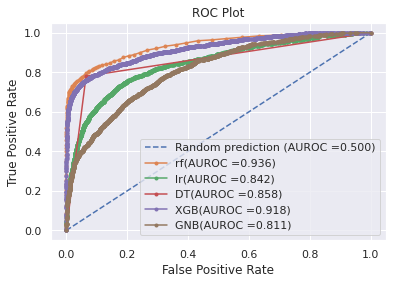

In [ ]:
plt.plot(r_fpr,r_tpr, linestyle='--',label='Random prediction (AUROC =%.3f)'%r_auc)
for item in probas:
  plt.plot(item['fpr'],item['tpr'], marker='.',label=item['model']+'(AUROC =%.3f)'%item['auc'])
#Title
plt.title('ROC Plot')
#Axis lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend()
#show plot
plt.show()

As we notice here that the random forest classifier and the XGB classifier are the best models to fit our unbalanced Data

## Choosing best classifiers (XGB)

### XGB

In [ ]:
xgbc=xgb.XGBClassifier()
xgbc.fit(X_train,y_train)
feature_importance = pd.DataFrame({'feature': X_train.columns, 
                                   'importance': xgbc.feature_importances_})
#keeping the positive values of features 
new_features_df = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)
features_to_drop = feature_importance[feature_importance['importance']<0.05]['feature']
features_to_drop.append(feature_importance[feature_importance['importance']>0.05]['feature'])
features_to_drop=features_to_drop[1:]

In [ ]:
X_train_clean=X_train.drop(features_to_drop,axis=1)

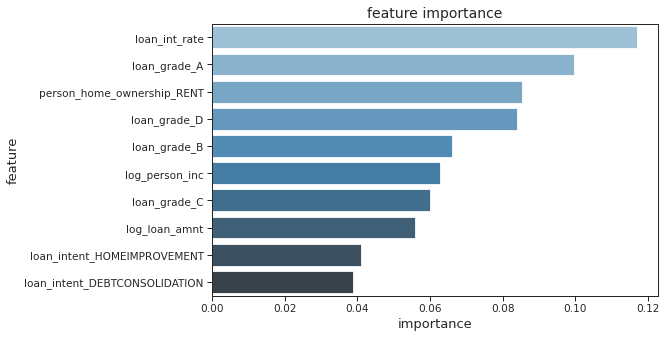

In [ ]:
#Plotting important features
sns.set(context='paper', style='ticks',  font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)
figure, ax = plt.subplots(figsize=(8, 5))
ax=sns.barplot(data = new_features_df[:10],
              y='feature',
              x='importance',
              palette='Blues_d') # rocket, Blues_d
ax.set_title('feature importance', fontsize=14)
ax.set_xlabel('importance', fontsize=13)
ax.set_ylabel('feature', fontsize=13)
plt.show()

####XGB paramaters Tuning with GridSearchCV 

In [ ]:

from sklearn.model_selection import StratifiedKFold
params = {
    "colsample_bytree": [0.9, 1],
    "gamma": [0.4,0.3],
    "learning_rate": [0.3,0.4], # default 0.1 
    "max_depth": [4,5], # default 3
    "n_estimators": [100,150,200], # default 100
    "subsample": [0.99, 0.98]
}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#without oversampling
Grid_CV= GridSearchCV(xgbc, param_grid=params, cv=folds,scoring='f1',verbose=1, n_jobs=16, return_train_score=True)
Grid_CV.fit(X_train_clean, y_train)


In [ ]:
# print best hyperparameters
print("Without OverSampling")
print("Best f1 score:%.3f "%Grid_CV.best_score_)
print("Best hyperparameters: ", Grid_CV.best_params_)


#### Model performance visualization

In [ ]:
X_test_clean=X_test.drop(features_to_drop,axis=1)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_best=xgb.XGBClassifier(colsample_bytree= 1, gamma= 0.4, learning_rate= 0.4,max_depth= 5, n_estimators= 150, subsample= 0.99)#colsample_bytree= 1, gamma= 0.4, learning_rate= 0.3,max_depth= 5, n_estimators= 150, subsample= 0.99
xgb_best.fit(X_train,y_train,eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

Y_pred_xgb=xgb_best.predict(X_test)
results =xgb_best.evals_result()
#HOUNIIIIIIII

In [ ]:
print(X_test.columns)


Index(['Unnamed: 0', 'person_age', 'person_emp_length', 'loan_int_rate',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y',
       'log_person_inc', 'log_loan_amnt'],
      dtype='object')


In [ ]:
xgb_best.save_model('xgbmodal.json')

In [ ]:
import pickle
filename = 'finalized_xgbmodel.pkl'
e=pickle.dump(xgb_best, open(filename, 'wb'))

array([0])

In [ ]:
m=pickle.load(open(filename,'rb'))
y=m.predict(X_test)

In [ ]:
df2 = pd.DataFrame(data={'Unnamed: 0':0, 'person_age':22, 'person_emp_length':2, 'loan_int_rate':3,
       'person_home_ownership_MORTGAGE':0, 'person_home_ownership_OTHER':1,
       'person_home_ownership_OWN':1, 'person_home_ownership_RENT':1,
       'loan_intent_DEBTCONSOLIDATION':1, 'loan_intent_EDUCATION':1,
       'loan_intent_HOMEIMPROVEMENT':0, 'loan_intent_MEDICAL':0,
       'loan_intent_PERSONAL':0, 'loan_intent_VENTURE':0, 'loan_grade_A':1,
       'loan_grade_B':1, 'loan_grade_C':0, 'loan_grade_D':0, 'loan_grade_E':0,
       'loan_grade_F':0, 'loan_grade_G':0, 'cb_person_default_on_file_Y':1,
       'log_person_inc':1, 'log_loan_amnt':0},index=[0])
m.predict(df2)


array([0])

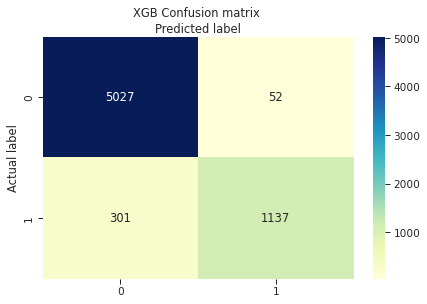

In [ ]:
cnf_matrix =Cnf_mtrx(y_test,y,'XGB')


In [ ]:
from sklearn.metrics import accuracy_score

Y_pred_proba = xgb_best.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, Y_pred_proba)
print('XGBClassifier:')
print('accuracy %.3f'%accuracy_score(y_test,Y_pred_xgb))
print('auc= %.3f'%auc)
print(classification_report(y_test,Y_pred_xgb))

XGBClassifier:
accuracy 0.950
auc= 0.971
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5079
           1       0.97      0.80      0.88      1438

    accuracy                           0.95      6517
   macro avg       0.96      0.90      0.92      6517
weighted avg       0.95      0.95      0.95      6517



####Classification Error and Log Loss plots 

In [ ]:
def Log_Loss_Plot(results):
  epochs = len(results['validation_0']['error'])
  x_axis = range(0, epochs)
  fig, ax = plt.subplots()
  ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
  ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
  ax.legend()
  plt.ylabel('Log Loss')
  plt.title('XGBoost Log Loss')
  return plt
def Classification_error_plot(results):
  epochs = len(results['validation_0']['error'])
  x_axis = range(0, epochs)
  fig, ax = plt.subplots()
  ax.plot(x_axis, results['validation_0']['error'], label='Train')
  ax.plot(x_axis, results['validation_1']['error'], label='Test')
  ax.legend()
  plt.ylabel('Classification Error')
  plt.title('XGBoost Classification Error')
  plt.show()
  return plt

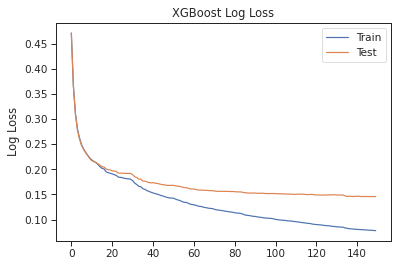

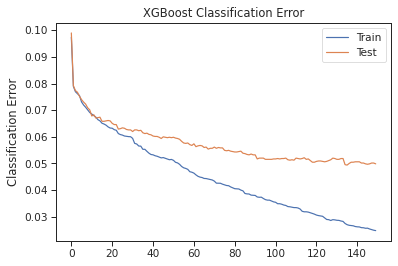

In [ ]:
plot1=Log_Loss_Plot(results)
plot2=Classification_error_plot(results)

####threshold optimization



In [ ]:
preds =xgb_best.predict_proba(X_test) # 1st col = pred val, 2nd col = pred prob
pred_probs = pd.DataFrame(preds[:,1],columns = ['Default Probability'])
pd.concat([pred_probs, y_test.reset_index(drop=True)],axis=1)
thresh = np.linspace(0,1,41)


In [ ]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,recall_score
def optimize_threshold(predict,thresholds =thresh, y_true = y_test):
    data = predict
    
    def_recalls = []
    nondef_recalls = []
    accs =[]
    def_precision=[]

    
    for threshold in thresholds:
        # predicted values for each threshold
         
         data['loan_status'] = data['Default Probability'].apply(lambda x: 1 if x > threshold else 0 )
         accs.append(accuracy_score(y_true, data['loan_status']))
         stats = precision_recall_fscore_support(y_true, data['loan_status'], zero_division=0)
         
         def_recalls.append(stats[1][1])
         nondef_recalls.append(stats[1][0])
         def_precision.append(stats[0][1])
        
        
    return accs, def_recalls, nondef_recalls, def_precision

In [ ]:
accs, def_recalls, nondef_recalls, def_precision = optimize_threshold(pred_probs)

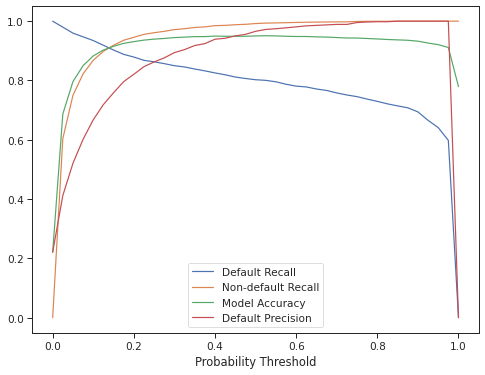

In [ ]:
figure = plt.subplots(figsize=(8, 6))
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.plot(thresh,def_precision)
plt.xlabel("Probability Threshold")
plt.legend(["Default Recall","Non-default Recall","Model Accuracy","Default Precision"])
plt.show()

In [ ]:
optim_threshold = accs.index(max(accs))
print('The model accuracy is {} using the optimal probabilty threshold'
      .format(round(accs[optim_threshold],3)))
print ('The optimal probabilty threshold is {}'.format(thresh[optim_threshold]))

The model accuracy is 0.951 using the optimal probabilty threshold
The optimal probabilty threshold is 0.525


In [ ]:
y_pred=xgb_best.predict(X_test)
for i in range(0,len(y_pred),1):
  if (pred_probs['Default Probability'][i] > thresh[optim_threshold]): 
    y_pred[i]=1
  else :
    y_pred[i]=0

print('accuracy: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cnf=Cnf_mtrx(y_test,y_pred,"XGBoost")

## Choosing the right threshhold to optimise default recall and balance wih precision

The last threshhold found, was to optimise model precision.
In our case we are dealing with an unbalanced data where the weak class is the default class (labeled 1) .

As well as it is very crucial that we get the recall error of this class to be low so we avoid the risk to classify risky loans as safe.

In the plot of threshhold vs recall, non_recall and precision we found a sweet spot to optimise the recall of the default without losing too much on the accuracy.

That's why we need to try diffrent threshholds in this area and find the best balance between precision and default recall

In [ ]:
#Finding the intersection point
threshs2=np.linspace(0.1,0.4,15)
#Calculating def_recall , nondef_recall and accuracies
accs2, def_recalls2, nondef_recalls2,default_precision2 = optimize_threshold(pred_probs,thresholds=threshs2)

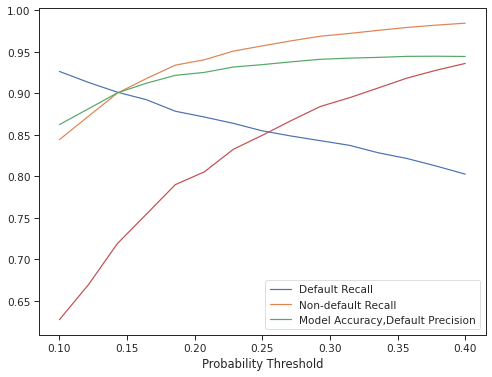

In [ ]:
#plotting a closer look of the graph above
figure = plt.subplots(figsize=(8, 6))
plt.plot(threshs2,def_recalls2)
plt.plot(threshs2,nondef_recalls2)
plt.plot(threshs2,accs2)
plt.plot(threshs2,default_precision2)
plt.xlabel("Probability Threshold")
plt.legend(["Default Recall","Non-default Recall","Model Accuracy,Default Precision"])
plt.show()

We see from this closer look that the intersection happens at (0.11,0.91) meaning that we can have a default recall and accuracy  = 91% which is the best we can hope for in our case


accuracy:  0.9053245358293693
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5079
           1       0.73      0.90      0.81      1438

    accuracy                           0.91      6517
   macro avg       0.85      0.90      0.87      6517
weighted avg       0.92      0.91      0.91      6517



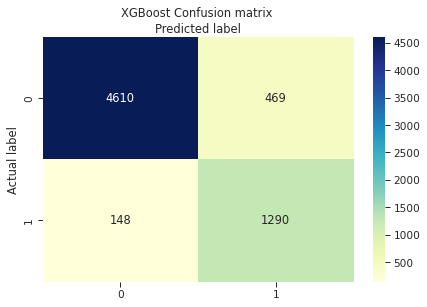

In [ ]:
#Picking the right threshhold
y_pred=xgb_best.predict(X_test)
for i in range(0,len(y_pred),1):
  if (pred_probs['Default Probability'][i] > 0.15): 
    y_pred[i]=1
  else :
    y_pred[i]=0
print('accuracy: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cnf=Cnf_mtrx(y_test,y_pred,"XGBoost")

### Random Forest

####RandomForestClassifier Hyperparameter Tuning 

In [ ]:

params = {
    'bootstrap': [True],
    'max_depth': [3, 6, 10],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 120, 150]
}

rf = RandomForestClassifier()
folds=StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
Grid_CV_1 = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = folds,scoring='f1',n_jobs = -1, verbose = 2)
Grid_CV_1.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 6, 10],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 120, 150]},
             scoring='f1', verbose=2)

In [ ]:
# print best hyperparameters
print("Without OverSampling")
print("Best f1 score: %.3f"%Grid_CV_1.best_score_)
print("Best hyperparameters: ", Grid_CV_1.best_params_)


Without OverSampling
Best f1 score: 0.813
Best hyperparameters:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


#### Model Performance Visualization

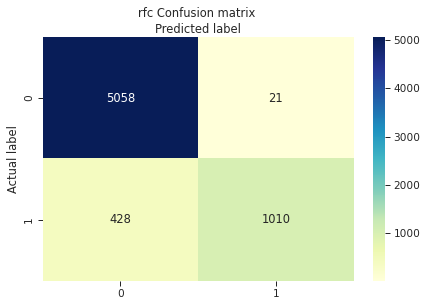

In [ ]:
rfc_best= RandomForestClassifier(bootstrap= True, max_depth= 10, min_samples_leaf= 1, min_samples_split= 4, n_estimators=150)
rfc_best.fit(X_train,y_train)
Y_pred2=rfc_best.predict(X_test)
cnf_matrix =Cnf_mtrx(y_test,Y_pred2,'rfc')



In [ ]:
Y_pred_proba_2 = rfc_best.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, Y_pred_proba_2)
print('Random Forest:')
print('accuracy %.3f'%accuracy_score(y_test,Y_pred2))
print('auc= %.3f'%auc)
print(classification_report(y_test,Y_pred2))

Random Forest:
accuracy 0.931
auc= 0.931
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5079
           1       0.98      0.70      0.82      1438

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



After Hyperparams tuning we see that the XGB ouperforms Random forest,having a higher auc score

####threshold optimization

In [ ]:
preds =rfc_best.predict_proba(X_test) # 1st col = pred val, 2nd col = pred prob
pred_probs = pd.DataFrame(preds[:,1],columns = ['Default Probability'])
pd.concat([pred_probs, y_test.reset_index(drop=True)],axis=1)
thresh = np.linspace(0,1,41)


In [ ]:
accs, def_recalls, nondef_recalls,def_precision = optimize_threshold(pred_probs)

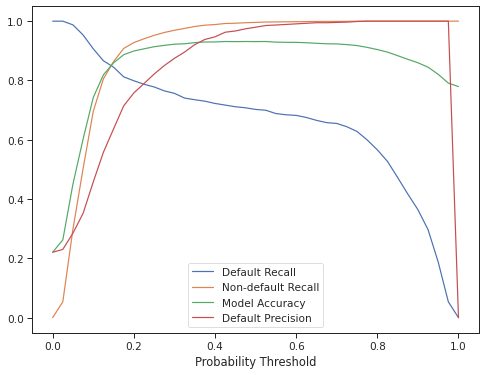

In [ ]:
figure = plt.subplots(figsize=(8, 6))
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.plot(thresh,def_precision)
plt.xlabel("Probability Threshold")
plt.legend(["Default Recall","Non-default Recall","Model Accuracy","Default Precision"])
plt.show()

In [ ]:
optim_threshold = accs.index(max(accs))
print('The Random Forest Classification model accuracy is {} using the optimal probabilty threshold'
      .format(round(accs[optim_threshold],3)))
print ('The optimal probabilty threshold is {}'.format(thresh[optim_threshold]))

The Random Forest Classification model accuracy is 0.931 using the optimal probabilty threshold
The optimal probabilty threshold is 0.42500000000000004


accuracy:  0.9314101580481817
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5079
           1       0.96      0.72      0.82      1438

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



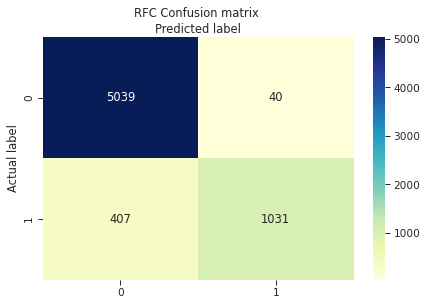

In [ ]:
y_pred=rfc_best.predict(X_test)
for i in range(0,len(y_pred),1):
  if (pred_probs['Default Probability'][i] > thresh[optim_threshold]): 
    y_pred[i]=1
  else :
    y_pred[i]=0
print('accuracy: ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cnf=Cnf_mtrx(y_test,y_pred,"RFC")

# Checking models after SMOTE

Since our data is unbalanced we are going to use a technique of oversampling to not lose points of our dataset

In [ ]:
#Train Data before SMOTE
N1=len(X_train)
NC0=len(y_train[y_train==0])
NC1=len(y_train[y_train==1])
print('The number of datapoints in the train Data is: %s'%N1)
print('The number of class 0 is: %s'%NC0)
print('The number of class 1 is: %s'%NC1)

The number of datapoints in the train Data is: 26064
The number of class 0 is: 20394
The number of class 1 is: 5670


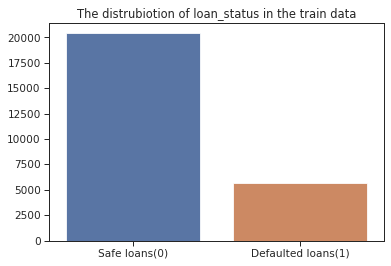

In [ ]:
plt.title("The distrubiotion of loan_status in the train data")
sns.barplot(x=['Safe loans(0)','Defaulted loans(1)'],y=[NC0,NC1])

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

In [ ]:
#Train Data after SMOTE
N1=len(X_train_res)
NC0=len(y_train_res[y_train_res==0])
NC1=len(y_train_res[y_train_res==1])
print('The number of datapoints in the train Data is: %s'%N1)
print('The number of class 0 is: %s'%NC0)
print('The number of class 1 is: %s'%NC1)

The number of datapoints in the train Data is: 40788
The number of class 0 is: 20394
The number of class 1 is: 20394


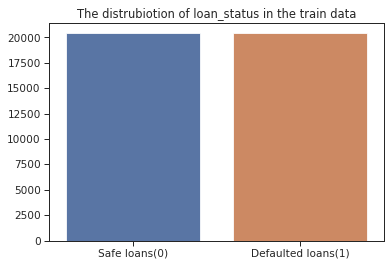

In [ ]:
plt.title("The distrubiotion of loan_status in the train data")
sns.barplot(x=['Safe loans(0)','Defaulted loans(1)'],y=[NC0,NC1])

RandomForestClassifier() :
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5079
           1       0.96      0.72      0.82      1438

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

LogisticRegression(max_iter=1000) :
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5079
           1       0.64      0.57      0.61      1438

    accuracy                           0.84      6517
   macro avg       0.76      0.74      0.75      6517
weighted avg       0.83      0.84      0.83      6517

DecisionTreeClassifier() :
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5079
           1       0.74      0.77      0.75      1438

    accuracy                           0.89      6517
   macro avg       0.84      0.85     

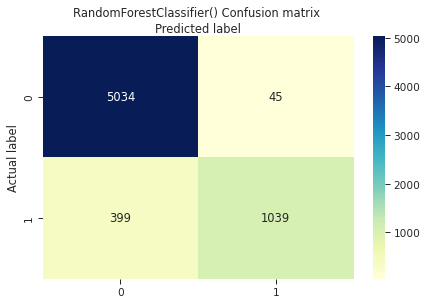

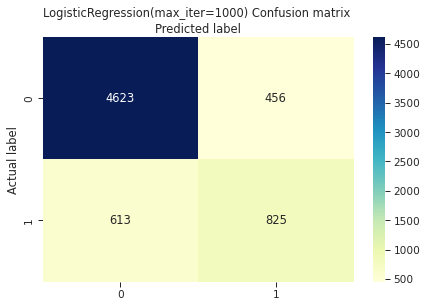

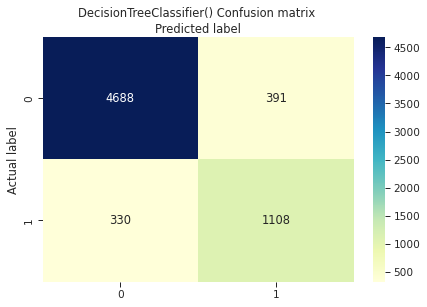

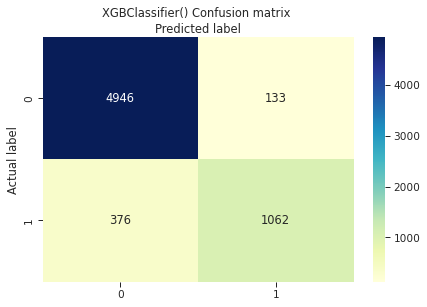

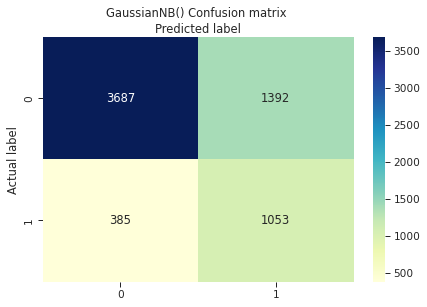

In [ ]:
#Checking model performances after SMOTE
from sklearn.model_selection import GridSearchCV
probas2=[]
for model,md in model_params.items() :
  print(md['model'],':')
  model_assess(md['model'],X_train_res,y_train_res)
  probas2.append({
      'model':model,
      'proba':md['model'].predict_proba(X_test)[:,1] #probability of the positive income is kept
  })

In [ ]:
#Computing AUC

for item in probas2:
  item['auc']=roc_auc_score(y_test,item['proba'])
  print(item['model'],': AUROC = %.3f'%item['auc'])

rf : AUROC = 0.935
lr : AUROC = 0.824
DT : AUROC = 0.847
XGB : AUROC = 0.923
GNB : AUROC = 0.812


In [ ]:
#computing fpr and tpr
from sklearn.metrics import roc_curve
for item in probas2:
  item['fpr'],item['tpr'],_=roc_curve(y_test,item['proba'])

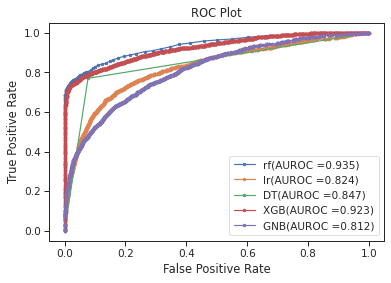

In [ ]:
import matplotlib.pyplot as plt

for item in probas2:
  plt.plot(item['fpr'],item['tpr'], marker='.',label=item['model']+'(AUROC =%.3f)'%item['auc'])
#Title
plt.title('ROC Plot')
#Axis lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend()
#show plot
plt.show()

# Checking models after undersampling 

In [ ]:
#Train Data before SMOTE
N1=len(X_train)
NC0=len(y_train[y_train==0])
NC1=len(y_train[y_train==1])
print('The number of datapoints in the train Data is: %s'%N1)
print('The number of class 0 is: %s'%NC0)
print('The number of class 1 is: %s'%NC1)

The number of datapoints in the train Data is: 26064
The number of class 0 is: 20394
The number of class 1 is: 5670


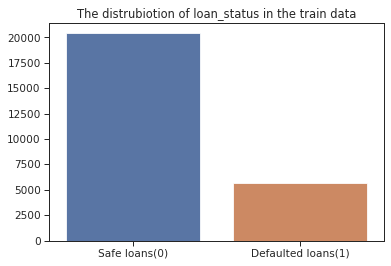

In [ ]:
plt.title("The distrubiotion of loan_status in the train data")
sns.barplot(x=['Safe loans(0)','Defaulted loans(1)'],y=[NC0,NC1])

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
RUS=RandomUnderSampler()
X_train_res2,y_train_res2=RUS.fit_resample(X_train,y_train)

In [ ]:
#Train Data after undersampling
N1=len(X_train_res2)
NC0=len(y_train_res2[y_train_res2==0])
NC1=len(y_train_res2[y_train_res2==1])
print('The number of datapoints in the train Data is: %s'%N1)
print('The number of class 0 is: %s'%NC0)
print('The number of class 1 is: %s'%NC1)

The number of datapoints in the train Data is: 11340
The number of class 0 is: 5670
The number of class 1 is: 5670


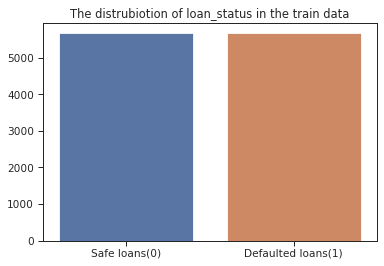

In [ ]:
plt.title("The distrubiotion of loan_status in the train data")
sns.barplot(x=['Safe loans(0)','Defaulted loans(1)'],y=[NC0,NC1])

RandomForestClassifier() :
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5079
           1       0.76      0.80      0.78      1438

    accuracy                           0.90      6517
   macro avg       0.85      0.87      0.86      6517
weighted avg       0.90      0.90      0.90      6517

LogisticRegression(max_iter=1000) :
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      5079
           1       0.47      0.78      0.59      1438

    accuracy                           0.76      6517
   macro avg       0.70      0.77      0.71      6517
weighted avg       0.82      0.76      0.78      6517

DecisionTreeClassifier() :
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      5079
           1       0.57      0.84      0.68      1438

    accuracy                           0.82      6517
   macro avg       0.76      0.83     

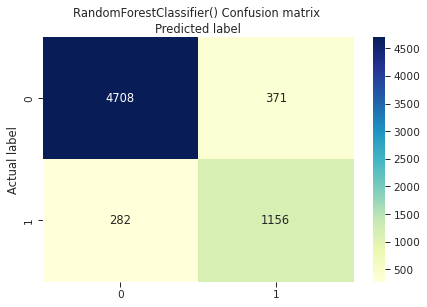

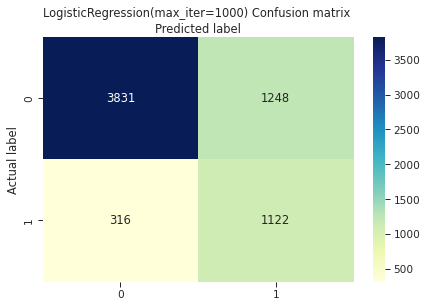

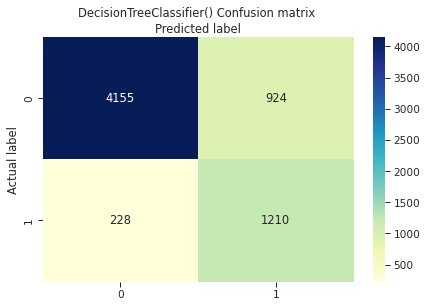

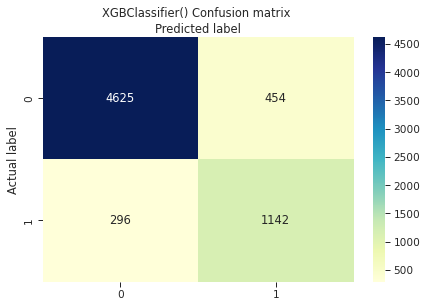

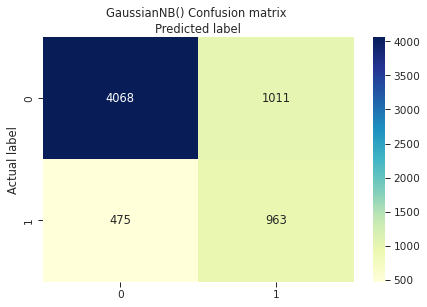

In [ ]:
#Checking model performances after CNN
from sklearn.model_selection import GridSearchCV
probas3=[]
for model,md in model_params.items() :
  print(md['model'],':')
  model_assess(md['model'],X_train_res2,y_train_res2)
  probas3.append({
      'model':model,
      'proba':md['model'].predict_proba(X_test)[:,1] #probability of the positive income is kept
  })

In [ ]:
#Computing AUC
#print('random (chance) prediction : AUROC = %.3f'%r_auc)
for item in probas3:
  item['auc']=roc_auc_score(y_test,item['proba'])
  print(item['model'],': AUROC = %.3f'%item['auc'])

rf : AUROC = 0.938
lr : AUROC = 0.840
DT : AUROC = 0.830
XGB : AUROC = 0.930
GNB : AUROC = 0.820


In [ ]:
#computing fpr and tpr
for item in probas3:
  item['fpr'],item['tpr'],_=roc_curve(y_test,item['proba'])

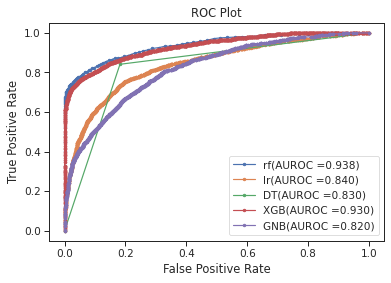

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(r_fpr,r_tpr, linestyle='--',label='Random prediction (AUROC =%.3f)'%r_auc)
for item in probas3:
  plt.plot(item['fpr'],item['tpr'], marker='.',label=item['model']+'(AUROC =%.3f)'%item['auc'])
#Title
plt.title('ROC Plot')
#Axis lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend()
#show plot
plt.show()